In [136]:
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6.5, 5))

In [137]:
import pandas as pd
import numpy as np
import tushare as ts
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [104]:
stkcd = ['60084%i' %i for i in range(3,9)]
data = pd.DataFrame()
for i in stkcd:
    close_data = ts.get_k_data(code=i,start='2017-01-01',end='2017-12-31')
    data = pd.concat([data,close_data['close']],axis=1)
data.index = close_data['date']
data.columns = stkcd

F:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002500072BE10>,
      dtype=object)

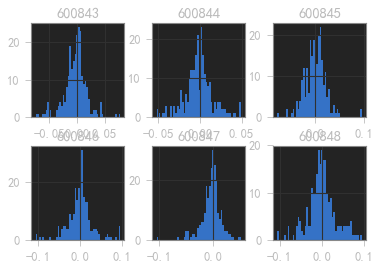

In [129]:
log_returns = np.log(data.pct_change()+1)
log_returns.hist(bins=50,layout=(2,3))

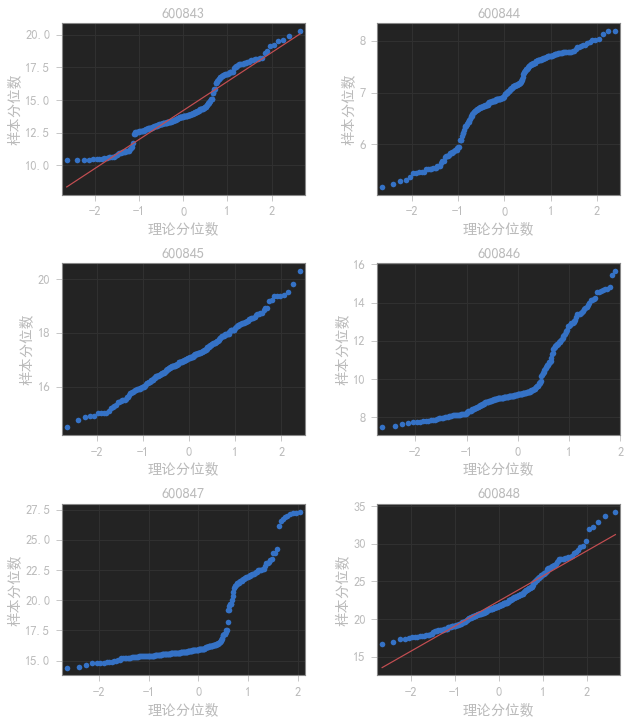

In [139]:
fig,axes=plt.subplots(3,2,figsize=(10,12))
for i in range(0,3):
    for j in range(0,2):
        sm.qqplot(data.iloc[:,2*i+j],line='s',ax=axes[i,j])
        axes[i,j].set_title(log_returns.columns[2*i+j])
        axes[i,j].set_xlabel('理论分位数')
        axes[i,j].set_ylabel('样本分位数')
        axes[i,j].grid(True)
plt.subplots_adjust(wspace=0.3,hspace=0.4)

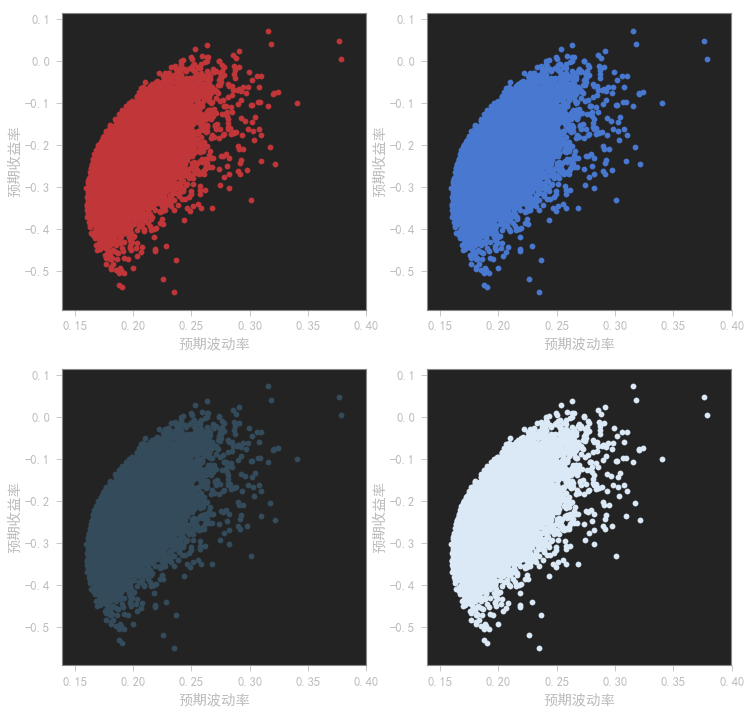

In [201]:
number = 10000
stock_num = len(log_returns.columns)
weights = np.random.rand(number,stock_num)
weights/=np.sum(weights,axis=1).reshape(-1,1)
prets = np.dot(weights,log_returns.mean())*252 #年化收益率
pvols = np.diag(np.sqrt(np.dot(weights,np.dot(log_returns.cov()*252,weights.T)))) #年化风险

import seaborn as sns 
palette = ['muted','Blues_d','Blues','RdBu']
fig,axes = plt.subplots(2,2,figsize=(12,12))
for i in range(len(palette)):
    plt.subplot(2,2,i+1)
    sns.set_palette(palette[i])
    plt.scatter(pvols,prets)
# plt.scatter(pvols,prets,c=(prets-0.05)/pvols,marker='o')
    plt.xlabel('预期波动率')
    plt.ylabel('预期收益率')
# plt.colorbar(label='夏普率')

In [180]:
import scipy.optimize as sco
def statistics(weights,rf=0.05):
    weights=np.array(weights)
    prets = np.sum(log_returns.mean()*weights*252) #年化收益率
    pvols = np.sqrt(np.dot(weights,np.dot(log_returns.cov()*252,weights.T))) #年化风险
    return pd.Series([prets,pvols,(prets-rf)/pvols],index=['预期收益率','预期波动率','夏普比率'])

def min_sharpe(weights): #最大化sharpe ratio
    return -statistics(weights)[2]

cons = ({'type':'eq','fun':lambda x:np.sum(x)-1})
bnds = tuple((0,1) for x in range(stock_num))

optmz = sco.minimize(min_sharpe,stock_num*[1/stock_num],method='SLSQP',bounds=bnds,constraints=cons)
statistics(optmz['x'].round(3))

预期收益率    0.140208
预期波动率    0.523664
夏普比率     0.172263
dtype: float64

In [203]:
data.to_dict('records')

[{'600843': 19.21,
  '600844': 8.13,
  '600845': 17.941,
  '600846': 9.245,
  '600847': 27.11,
  '600848': 19.383},
 {'600843': 19.58,
  '600844': 8.18,
  '600845': 18.326,
  '600846': 9.334,
  '600847': 26.69,
  '600848': 19.671},
 {'600843': 19.49,
  '600844': 8.19,
  '600845': 18.454,
  '600846': 9.443,
  '600847': 27.21,
  '600848': 19.96},
 {'600843': 19.92,
  '600844': 8.02,
  '600845': 18.276,
  '600846': 9.344,
  '600847': 27.34,
  '600848': 20.089},
 {'600843': 20.3,
  '600844': 8.02,
  '600845': 18.247,
  '600846': 9.404,
  '600847': 27.24,
  '600848': 20.298},
 {'600843': 19.12,
  '600844': 7.97,
  '600845': 18.099,
  '600846': 9.314,
  '600847': 26.89,
  '600848': 20.099},
 {'600843': 18.08,
  '600844': 7.88,
  '600845': 18.118,
  '600846': 9.205,
  '600847': 26.52,
  '600848': 19.95},
 {'600843': 18.24,
  '600844': 7.75,
  '600845': 17.625,
  '600846': 9.096,
  '600847': 26.11,
  '600848': 20.298},
 {'600843': 17.63,
  '600844': 7.85,
  '600845': 17.23,
  '600846': 8.987,
